In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.feature_selection import RFE


In [3]:
filePath = "E:\\Cntt_Class\\PTDLL\\BTL_PTDLL_N10_CarPricePrediction\\dataset.csv"
dataFrame = pd.read_csv(filePath)
dataFrame.head(5)

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [4]:
# X√≥a C·ªôt New_Price
dataFrame = dataFrame.drop(columns=['New_Price'])
# X√≥a h√†ng c√≥ gi√° tr·ªã NULL
dataFrame = dataFrame.dropna()
# T·∫°o Index
dataFrame = dataFrame.rename(columns={'Unnamed: 0': 'ID'})

# Tr√≠ch xu·∫•t d·ªØ li·ªáu s·ªë t·ª´ c√°c c·ªôt c√≥ d·ªØ li·ªáu s·ªë v√† k√Ω t·ª±
dataFrame['Engine_Number'] = dataFrame['Engine'].str.extract(r'(\d+)')
dataFrame['Engine_Number'] = pd.to_numeric(dataFrame['Engine_Number'], errors='coerce')

dataFrame['Power_Number'] = dataFrame['Power'].str.extract(r'(\d+\.*\d*)')
dataFrame['Power_Number'] = pd.to_numeric(dataFrame['Power_Number'], errors='coerce')

# ƒêi·ªÅn gi√° tr·ªã khuy·∫øt cho c·ªôt Power_Number
dataFrame = dataFrame.fillna(dataFrame['Power_Number'].mean())

# T·∫°o 1 c·ªôt l∆∞u l·∫°i ƒë∆°n v·ªã c·ªßa c·ªôt Mileage
dataFrame['Mileage_unit'] = dataFrame['Mileage'].apply(lambda x: 'kmpl' if 'kmpl' in str(x) else 'km/kg')
# Chuy·ªÉn ƒë∆°n v·ªã km/kg sang kmpl c·ªßa c·ªôt Mileage
dataFrame['Mileage'] = dataFrame['Mileage'].apply(lambda x: float(x.split()[0]) * 2.352 if 'km/kg' in x else float(x.split()[0]))

# Chuy·ªÉn c√°c c·ªôt phi s·ªë sang s·ªë ƒë·ªÉ ph√¢n t√≠ch v√† d·ª± b√°o
fuel_type_mapping = {'CNG': 1, 'Diesel': 2, 'Petrol': 3, 'LPG': 4}
dataFrame['Fuel_Type'] = dataFrame['Fuel_Type'].map(fuel_type_mapping)
transmission_type_mapping = {'Manual': 1, 'Automatic': 2}
dataFrame['Transmission'] = dataFrame['Transmission'].map(transmission_type_mapping)
owner_type_mapping = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}
dataFrame['Owner_Type'] = dataFrame['Owner_Type'].map(owner_type_mapping)

# B·ªè ƒëi c√°c c·ªôt c≈©
dataFrame = dataFrame.drop(columns = ['Mileage_unit', 'Power', 'Engine', 'Location', 'Name'])

# B·ªè ƒëi c√°c c·ªôt b·ªã l·∫∑p
dataFrame = dataFrame.drop_duplicates(keep='first')

dataFrame.to_csv('E:\\Cntt_Class\\PTDLL\\BTL_PTDLL_N10_CarPricePrediction\\data_ok.csv', sep=',' )

In [4]:
#Ki·ªÉm tra gi√° tr·ªã null v√† gi√° tr·ªã l·∫∑p c√°c c·ªôt
missing_data = dataFrame.isnull().sum()
duplicate_data = dataFrame.duplicated()

print("S·ªë li·ªáu thi·∫øu trong m·ªói c·ªôt:")
print(missing_data)

print("\nS·ªë li·ªáu tr√πng l·∫∑p:")
print(duplicate_data.sum())

S·ªë li·ªáu thi·∫øu trong m·ªói c·ªôt:
ID                   0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Seats                0
Price                0
Engine_Number        0
Power_Number         0
dtype: int64

S·ªë li·ªáu tr√πng l·∫∑p:
0


TOM LUOC DU LIEU

In [8]:
dataFrame.describe()

ID         Year  Kilometers_Driven    Fuel_Type  Transmission  \
count  5975.00000  5975.000000       5.975000e+03  5975.000000   5975.000000   
mean   3008.80887  2013.386778       5.867431e+04     2.448201      1.286025   
std    1739.30056     3.247238       9.155851e+04     0.519090      0.451939   
min       0.00000  1998.000000       1.710000e+02     1.000000      1.000000   
25%    1502.50000  2012.000000       3.390800e+04     2.000000      1.000000   
50%    3010.00000  2014.000000       5.300000e+04     2.000000      1.000000   
75%    4514.50000  2016.000000       7.300000e+04     3.000000      2.000000   
max    6018.00000  2019.000000       6.500000e+06     4.000000      2.000000   

        Owner_Type      Mileage        Seats        Price  Engine_Number  \
count  5975.000000  5975.000000  5975.000000  5975.000000    5975.000000   
mean      1.200669    18.545355     5.278828     9.501647    1621.606695   
std       0.453458     6.243064     0.808959    11.205736     601.036987   
min       1.000000     0.000000     0.000000     0.440000     624.000000   
25%       1.000000    15.260000     5.000000     3.500000    1198.000000   
50%       1.000000    18.200000     5.000000     5.650000    1493.000000   
75%       1.000000    21.100000     5.000000     9.950000    1984.000000   
max       4.000000    78.886080    10.000000   160.000000    5998.000000   

       Power_Number  
count   5975.000000  
mean     113.276894  
std       53.415373  
min       34.200000  
25%       77.000000  
50%       98.600000  
75%      138.100000  
max      560.000000

CHUYEN DOI DU LIEU

In [5]:
from sklearn.preprocessing import MinMaxScaler
def min_max_nor(data, column):
    col = np.array(data[column]).reshape(-1, 1)
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(col)
    return data

# Example usage:
df_minmax_nor = min_max_nor(dataFrame, 'Power_Number')
df_minmax_nor.head(10)
from sklearn.preprocessing import MinMaxScaler

def min_max_nor(data, column):
    col = np.array(data[column]).reshape(-1, 1)
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(col)
    return data

# Example usage:
df_minmax_nor = min_max_nor(dataFrame, 'Mileage')
df_minmax_nor.to_csv('E:\\Cntt_Class\\PTDLL\\BTL_PTDLL_N10_CarPricePrediction\\data_normalization.csv', sep=',')

PH√ÇN T√çCH M√î T·∫¢

D·ªØ li·ªáu 15 d√≤ng ƒë·∫ßu sau ti·ªÅn x·ª≠ l√Ω

In [11]:
df_minmax_nor.head(15)

ID  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0    0  2010              72000          1             1           1   
1    1  2015              41000          2             1           1   
2    2  2011              46000          3             1           1   
3    3  2012              87000          2             1           1   
4    4  2013              40670          2             2           2   
5    5  2012              75000          4             1           1   
6    6  2013              86999          2             1           1   
7    7  2016              36000          2             2           1   
8    8  2013              64430          2             1           1   
9    9  2012              65932          2             1           2   
10  10  2018              25692          3             1           1   
11  11  2012              60000          3             2           1   
12  12  2015              64424          2             1           1   
13  13  2014              72000          2             2           1   
14  14  2012              85000          2             2           2   

     Mileage  Seats  Price  Engine_Number  Power_Number  
0   0.793083    5.0   1.75            998      0.045569  
1   0.249347    5.0  12.50           1582      0.174971  
2   0.230712    5.0   4.50           1199      0.103652  
3   0.263291    7.0   6.00           1248      0.103766  
4   0.192683    5.0  17.74           1968      0.202739  
5   0.629100    5.0   2.35            814      0.039939  
6   0.292574    5.0   3.50           1461      0.054964  
7   0.144005    8.0  17.50           2755      0.261126  
8   0.260375    5.0   5.20           1598      0.131989  
9   0.282686    5.0   1.95           1248      0.075694  
10  0.273306    5.0   9.95           1462      0.131324  
11  0.212965    5.0   4.49           1497      0.156143  
12  0.319448    5.0   5.60           1248      0.075694  
13  0.160992    5.0  27.00           2179      0.291936  
14  0.000000    5.0  17.50           2179      0.153671

B·∫£ng th·ªëng k√™ c√°c ƒë·∫°i l∆∞·ª£ng

C·ªôt ƒë·ªãnh l∆∞·ª£ng (Numeric columns): Year, Kilometers_Driven, Mileage, Seats, Price, Engine_Number, Power_Number

In [12]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Seats', 'Price', 'Engine_Number', 'Power_Number']
df_minmax_nor[numeric_cols].describe()

Year  Kilometers_Driven      Mileage        Seats        Price  \
count  5975.000000       5.975000e+03  5975.000000  5975.000000  5975.000000   
mean   2013.386778       5.867431e+04     0.235090     5.278828     9.501647   
std       3.247238       9.155851e+04     0.079140     0.808959    11.205736   
min    1998.000000       1.710000e+02     0.000000     0.000000     0.440000   
25%    2012.000000       3.390800e+04     0.193444     5.000000     3.500000   
50%    2014.000000       5.300000e+04     0.230712     5.000000     5.650000   
75%    2016.000000       7.300000e+04     0.267474     5.000000     9.950000   
max    2019.000000       6.500000e+06     1.000000    10.000000   160.000000   

       Engine_Number  Power_Number  
count    5975.000000   5975.000000  
mean     1621.606695      0.150393  
std       601.036987      0.101589  
min       624.000000      0.000000  
25%      1198.000000      0.081400  
50%      1493.000000      0.122480  
75%      1984.000000      0.197604  
max      5998.000000      1.000000

Ph√¢n ph·ªëi d·ªØ li·ªáu

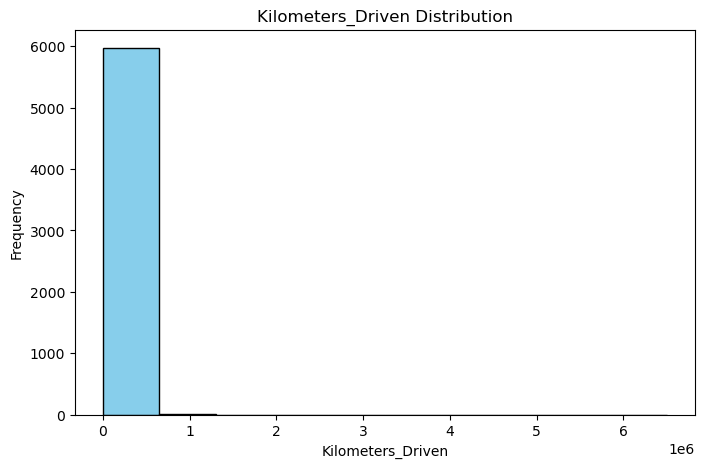

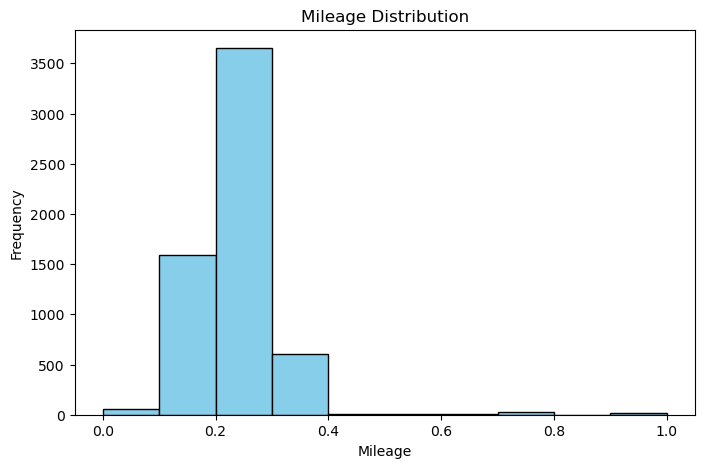

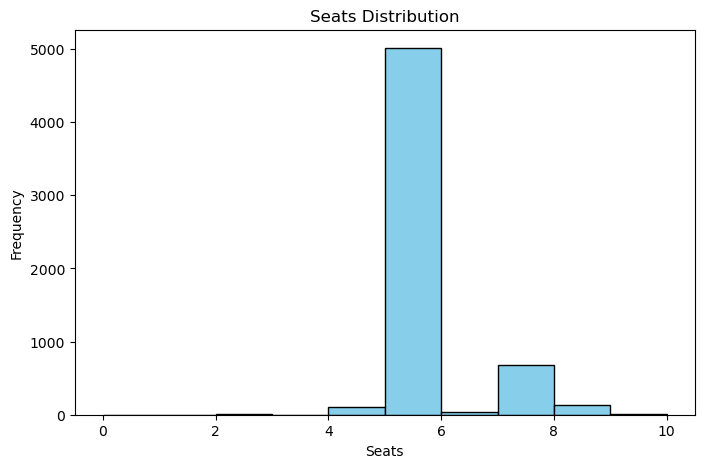

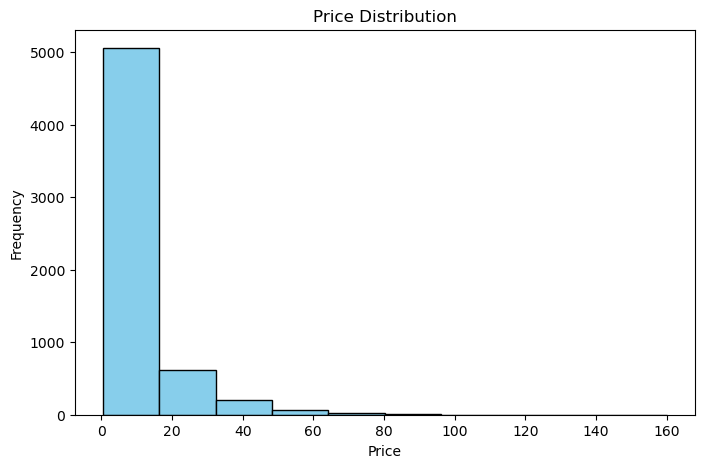

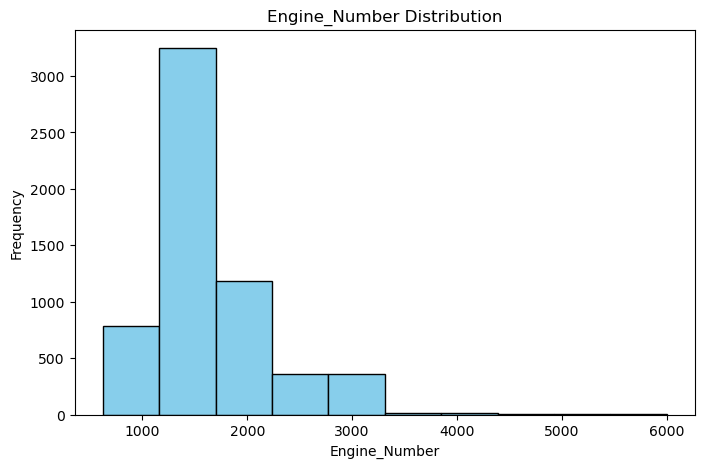

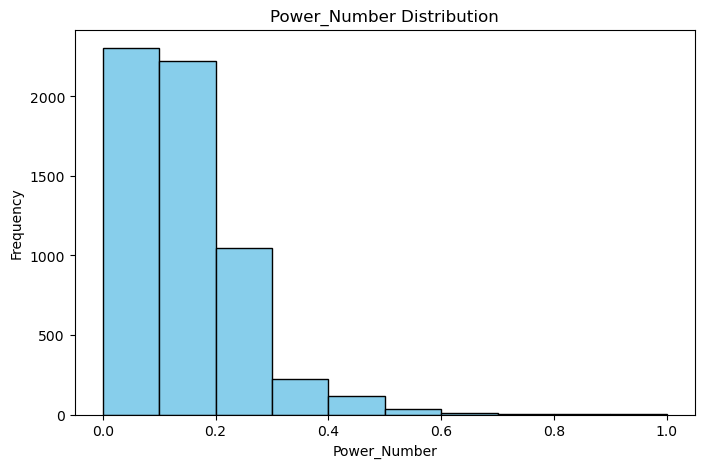

In [13]:
columns = ['Kilometers_Driven', 'Mileage', 'Seats', 'Price', 'Engine_Number', 'Power_Number']
for col in columns:
    plt.figure(figsize=(8, 5))
    df_minmax_nor[col].hist(bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

Gi√° tr·ªã ngo·∫°i l·ªá v√† so s√°nh ph√¢n ph·ªëi c√°c c·ªôt.

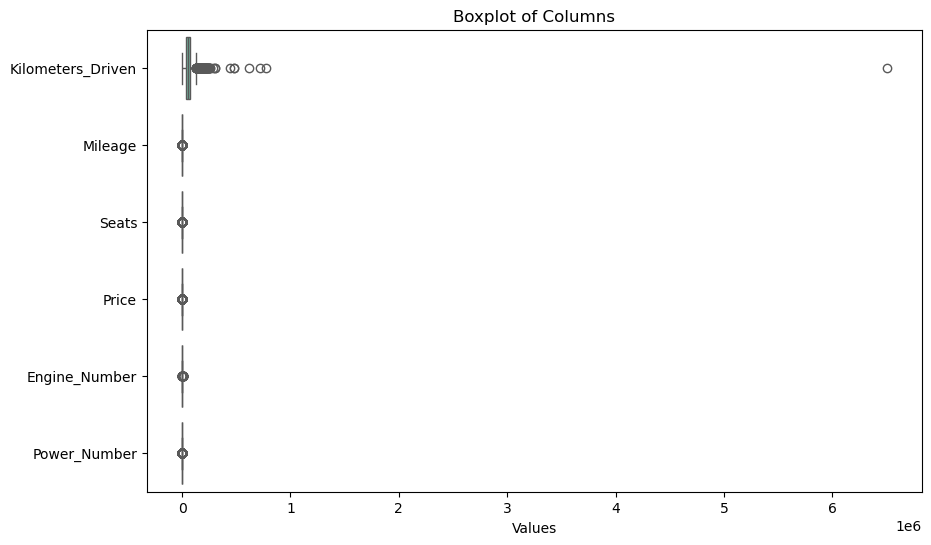

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_minmax_nor[columns], orient='h', palette='Set2')
plt.title('Boxplot of Columns')
plt.xlabel('Values')
plt.show()

C·ªôt ƒë·ªãnh t√≠nh (Categorical columns): Fuel_Type, Transmission, Owner_Type

In [15]:
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']
for col in categorical_cols:
    print(f"\nTh·ªëng k√™ cho c·ªôt {col}:")
    print(df_minmax_nor[col].value_counts(normalize=True) * 100)


Th·ªëng k√™ cho c·ªôt Fuel_Type:
Fuel_Type
2    53.472803
3    45.422594
1     0.937238
4     0.167364
Name: proportion, dtype: float64

Th·ªëng k√™ cho c·ªôt Transmission:
Transmission
1    71.39749
2    28.60251
Name: proportion, dtype: float64

Th·ªëng k√™ cho c·ªôt Owner_Type:
Owner_Type
1    82.058577
2    15.949791
3     1.857741
4     0.133891
Name: proportion, dtype: float64


Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªôt ƒë·ªãnh t√≠nh

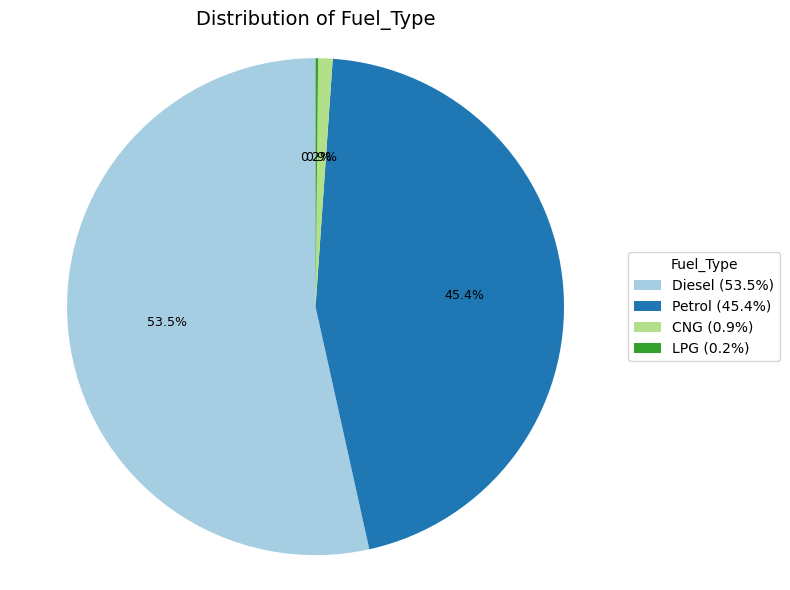

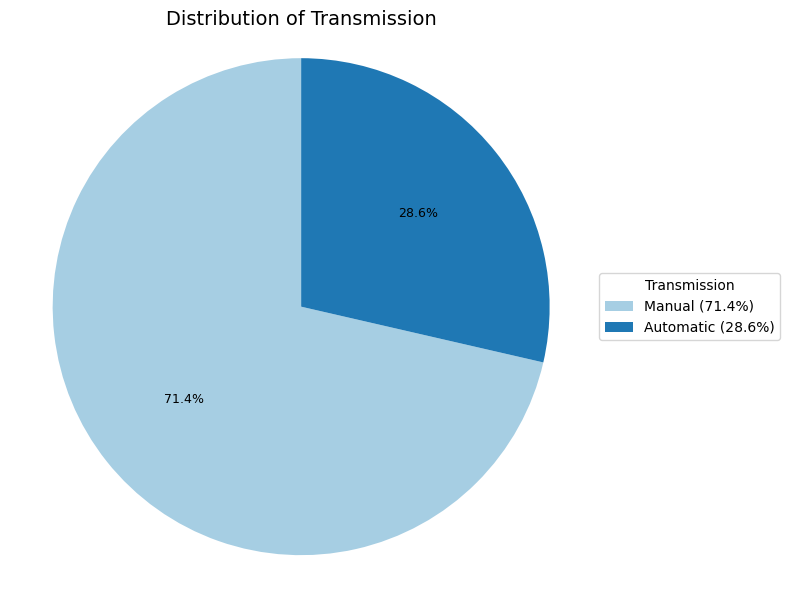

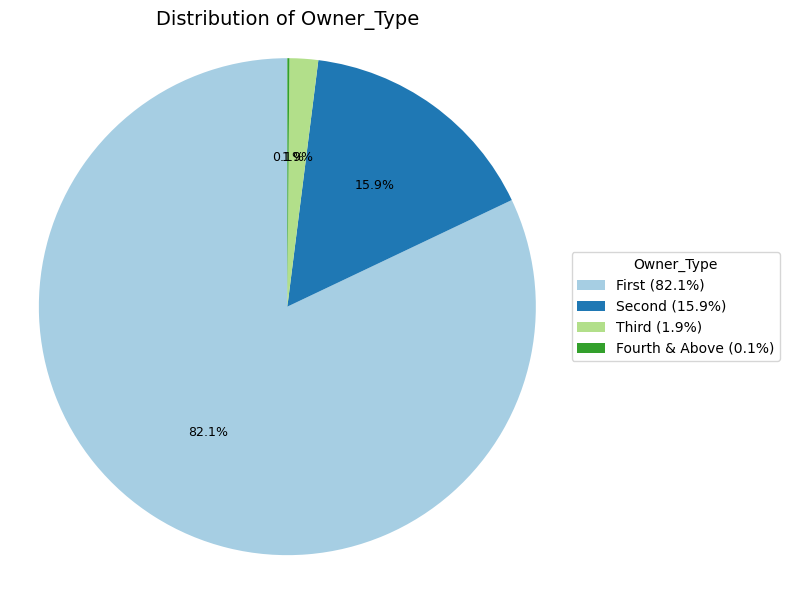

In [16]:
import matplotlib.pyplot as plt

# T·∫°o t·ª´ ƒëi·ªÉn √°nh x·∫° ƒë√∫ng
mappings = {
    'Fuel_Type': {1: 'CNG', 2: 'Diesel', 3: 'Petrol', 4: 'LPG'},  # S·ª≠a √°nh x·∫° ƒë√∫ng theo mapping ban ƒë·∫ßu
    'Transmission': {1: 'Manual', 2: 'Automatic'},
    'Owner_Type': {1: 'First', 2: 'Second', 3: 'Third', 4: 'Fourth & Above'}  # Th√™m √°nh x·∫° cho 'Fourth & Above'
}

# Danh s√°ch c√°c c·ªôt ph√¢n lo·∫°i
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']

# V·∫Ω bi·ªÉu ƒë·ªì Pie Chart v·ªõi nh√£n ƒë∆∞·ª£c b·ªë tr√≠ h·ª£p l√Ω
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    
    # √Ånh x·∫° gi√° tr·ªã c·ªôt sang nh√£n
    mapped_values = dataFrame[col].map(mappings[col])  # D√πng c·ªôt `dataFrame` v·ªõi √°nh x·∫° ƒë√∫ng
    values = mapped_values.value_counts()  # ƒê·∫øm s·ªë l∆∞·ª£ng t·ª´ng lo·∫°i
    labels = values.index.tolist()  # Nh√£n cho bi·ªÉu ƒë·ªì
    sizes = values.values  # T·∫ßn su·∫•t
    
    # T√≠nh ph·∫ßn trƒÉm cho m·ªói ph·∫ßn v√† t·∫°o nh√£n v·ªõi ph·∫ßn trƒÉm
    percentages = [f"{label} ({size/values.sum()*100:.1f}%)" for label, size in zip(labels, sizes)]
    
    # V·∫Ω Pie Chart
    wedges, texts, autotexts = plt.pie(
        sizes,
        labels=None,
        autopct='%1.1f%%',  # Hi·ªÉn th·ªã ph·∫ßn trƒÉm trong bi·ªÉu ƒë·ªì
        startangle=90,
        colors=plt.cm.Paired.colors,
        labeldistance=1.1  # TƒÉng kho·∫£ng c√°ch nh√£n t·ª´ t√¢m
    )

    # T√πy ch·ªânh hi·ªÉn th·ªã nh√£n
    for text in texts:
        text.set_fontsize(10)  # K√≠ch th∆∞·ªõc nh√£n b√™n ngo√†i
    for autotext in autotexts:
        autotext.set_fontsize(9)  # K√≠ch th∆∞·ªõc nh√£n ph·∫ßn trƒÉm b√™n trong
    
    # Th√™m ch√∫ th√≠ch (Legend) b√™n ngo√†i v·ªõi ph·∫ßn trƒÉm
    plt.legend(wedges, percentages, title=col, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
    
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.axis('equal')  # ƒê·∫£m b·∫£o bi·ªÉu ƒë·ªì tr√≤n
    plt.tight_layout()  # T·ª± ƒë·ªông cƒÉn ch·ªânh ƒë·ªÉ kh√¥ng b·ªã tr√†n
    plt.show()


Ph√¢n b·ªï c√°c h√£ng xe v√† s·ªë l∆∞·ª£ng b√°n t∆∞∆°ng ·ª©ng

Text(0, 0.5, 'Count of cars')

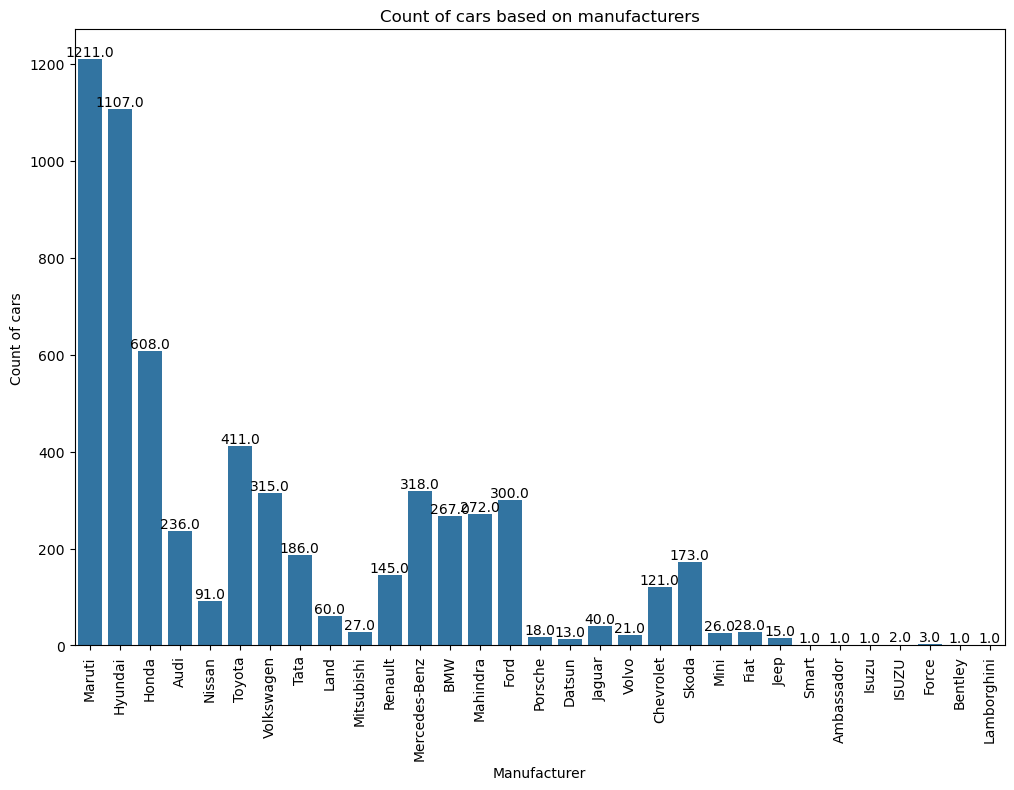

In [17]:
dataFrame2 = pd.read_csv(filePath)
cl = dataFrame2["Name"].str.split(" ", expand = True)
dataFrame2["Manufacturer"] = cl[0]
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = dataFrame2)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Bi·ªÉu ƒë·ªì v·ªÅ s·ª± thay ƒë·ªïi gi√° xe theo t·ª´ng nƒÉm

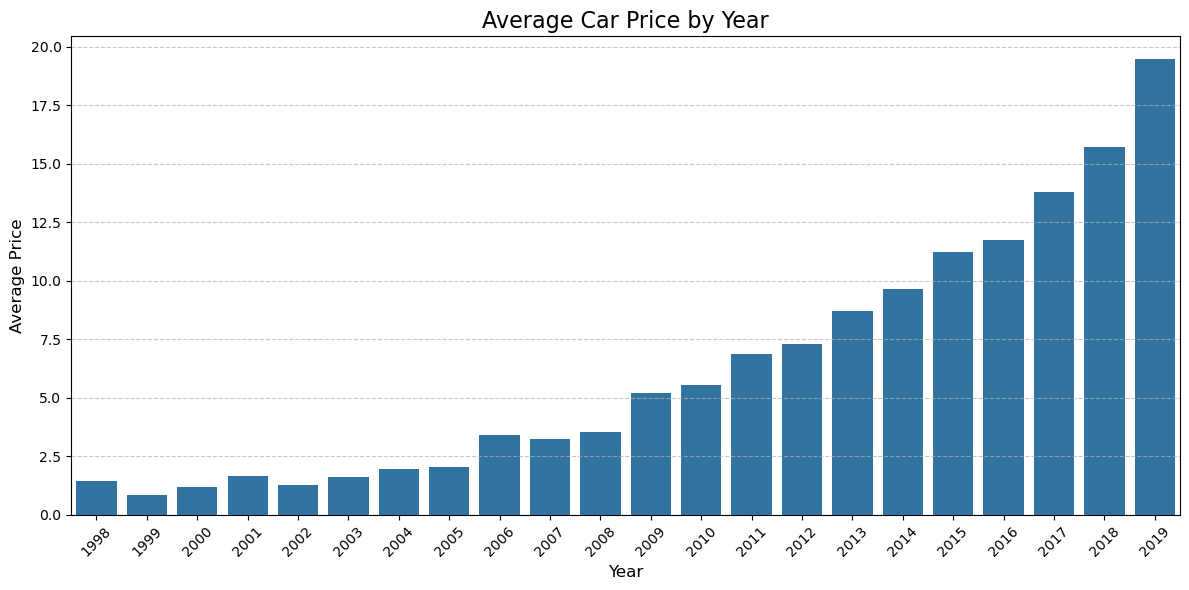

In [18]:
# T√≠nh gi√° tr·ªã trung b√¨nh c·ªßa 'Price' theo 'Year'
average_price_per_year = df_minmax_nor.groupby('Year')['Price'].mean().reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt (Vertical Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_per_year, x='Year', y='Price', legend=False)

# T√πy ch·ªânh bi·ªÉu ƒë·ªì
plt.title('Average Car Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

Bi·ªÉu ƒë·ªì ph√¢n b·ªï gi√° xe theo ph∆∞∆°ng th·ª©c s·∫£n xu·∫•t

C:\Users\xuanv\AppData\Local\Temp\ipykernel_8332\840681704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_minmax_nor, x='Transmission', y='Price', order=sorted_transmissions, palette='Set2')


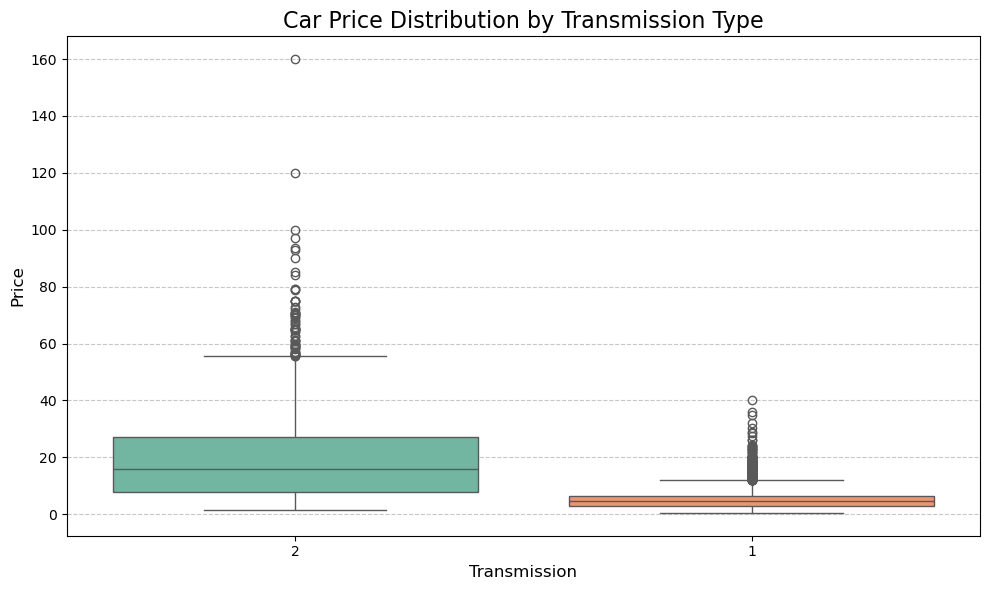

In [19]:
transmission_price_mean = (
    df_minmax_nor.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
)
# S·∫Øp x·∫øp th·ª© t·ª± tr√™n tr·ª•c x theo gi√° tr·ªã trung b√¨nh ƒë√£ t√≠nh
sorted_transmissions = transmission_price_mean.index

# V·∫Ω bi·ªÉu ƒë·ªì h·ªôp (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_minmax_nor, x='Transmission', y='Price', order=sorted_transmissions, palette='Set2')

# T√πy ch·ªânh bi·ªÉu ƒë·ªì
plt.title('Car Price Distribution by Transmission Type', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

Bi·ªÉu ƒë·ªì ph√¢n b·ªï trung b√¨nh gi√° xe theo t·ª´ng nƒÉm ƒë·ªëi
v·ªõi m·ªói h√£ng xe.

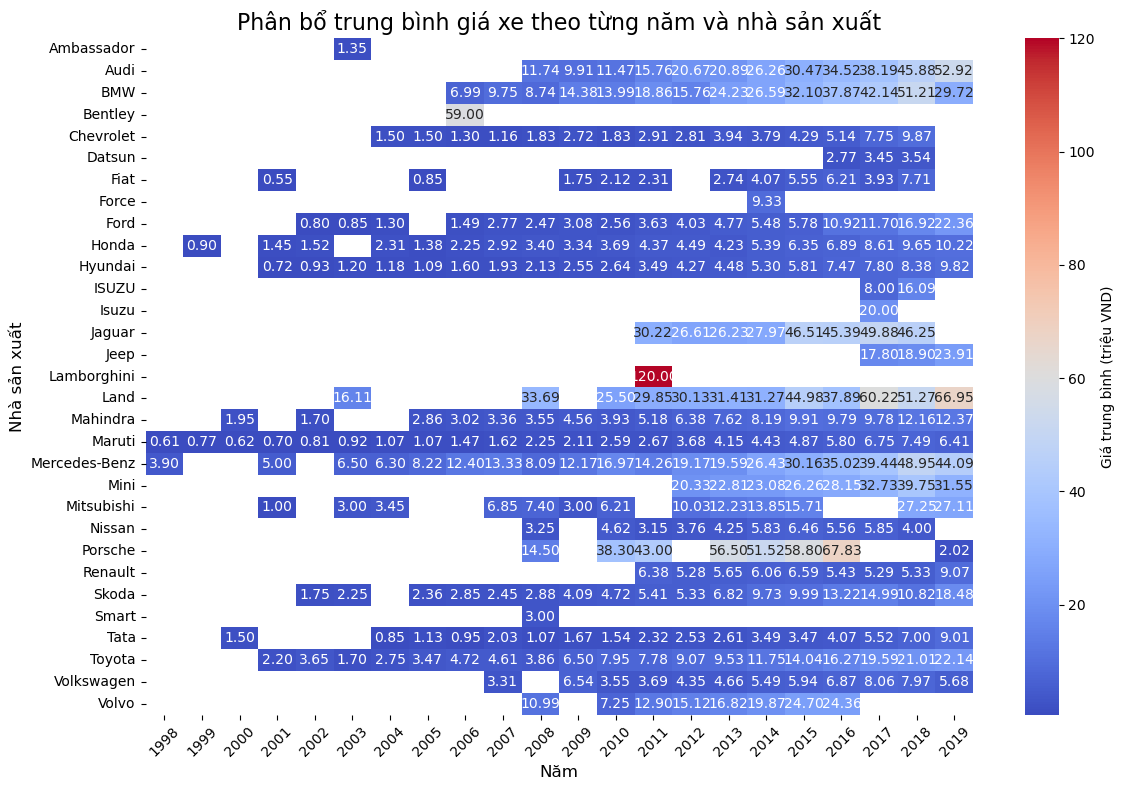

In [20]:

average_price_by_year_manufacturer = dataFrame2.groupby(['Year', 'Manufacturer'])['Price'].mean().reset_index()

# Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu sang d·∫°ng pivot (Year l√† c·ªôt, Manufacturer l√† h√†ng)
pivot_table = average_price_by_year_manufacturer.pivot(index='Manufacturer', columns='Year', values='Price')

# V·∫Ω bi·ªÉu ƒë·ªì Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Gi√° trung b√¨nh (tri·ªáu VND)'})
plt.title('Ph√¢n b·ªï trung b√¨nh gi√° xe theo t·ª´ng nƒÉm v√† nh√† s·∫£n xu·∫•t', fontsize=16)
plt.xlabel('NƒÉm', fontsize=12)
plt.ylabel('Nh√† s·∫£n xu·∫•t', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Bi·ªÉu ƒë·ªì t∆∞∆°ng quan gi·ªØa c√°c thu·ªôc t√≠nh

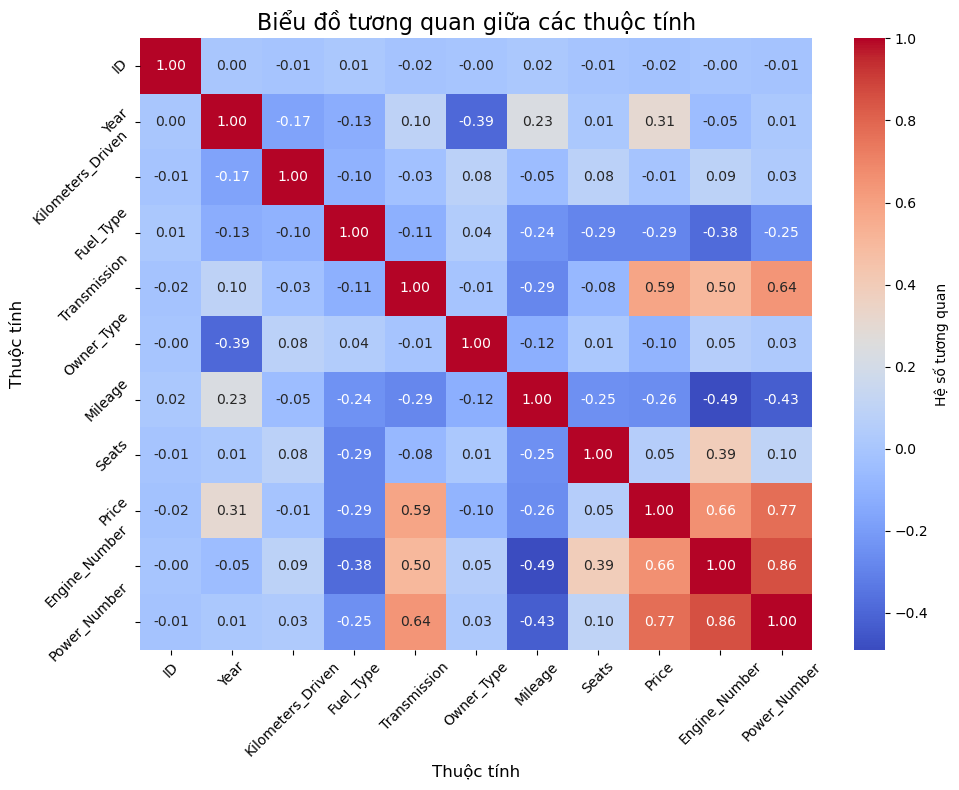

In [21]:
correlation_matrix = df_minmax_nor.corr()
# V·∫Ω bi·ªÉu ƒë·ªì Heatmap bi·ªÉu di·ªÖn t∆∞∆°ng quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'H·ªá s·ªë t∆∞∆°ng quan'})
plt.title('Bi·ªÉu ƒë·ªì t∆∞∆°ng quan gi·ªØa c√°c thu·ªôc t√≠nh', fontsize=16)
plt.xlabel('Thu·ªôc t√≠nh', fontsize=12)
plt.ylabel('Thu·ªôc t√≠nh', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Ph√¢n t√≠ch d·ª±a tr√™n ph∆∞∆°ng ph√°p h·ªìi quy tuy·∫øn t√≠nh

In [6]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import joblib
# T·∫°o data
X = df_minmax_nor[['Year', 'Kilometers_Driven', 'Mileage', 'Seats', 'Engine_Number', 'Power_Number', 'Fuel_Type', 'Transmission', 'Owner_Type']]
Y = df_minmax_nor['Price']

# Chia t·∫≠p train v√† test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# T·∫°o model
model = LinearRegression()

# Train model
model.fit(X_train, Y_train)

# Ki·ªÉm tra ƒë·ªô ch√≠nh x√°c
Y_pred = model.predict(X_test)
print(Y_pred.shape)

# T√≠nh MSE v√† R-squared
mse = mean_squared_error(Y_test, Y_pred)  # ƒêo l∆∞·ªùng trung b√¨nh c·ªßa b√¨nh ph∆∞∆°ng sai s·ªë
r2 = r2_score(Y_test, Y_pred)

# In ra MSE v√† R-squared
print('Mean Squared Error:', mse)
print('R-squared:', r2)

print('R Square: ', model.score(X, Y))
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)

# S·ª≠ d·ª•ng 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # KFold v·ªõi 10 t·∫≠p
cv_mse_scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kf)
cv_r2_scores = cross_val_score(model, X, Y, scoring='r2', cv=kf)

# Chuy·ªÉn ƒë·ªïi MSE sang gi√° tr·ªã d∆∞∆°ng
cv_mse_scores = -cv_mse_scores

# In k·∫øt qu·∫£ cross-validation
print(f'Cross-Validation Mean Squared Error (10 folds): {np.mean(cv_mse_scores):.4f}')
print(f'Cross-Validation R-squared (10 folds): {np.mean(cv_r2_scores):.4f}')
# Sau khi hu·∫•n luy·ªán m√¥ h√¨nh
joblib.dump(model, "trained_model.pkl")

(4780, 9) (1195, 9) (4780,) (1195,)
(1195,)
Mean Squared Error: 72.71186745713628
R-squared: 0.5005254020877912
R Square:  0.667385263345307
Slope:  [ 9.01270083e-01 -1.97340093e-05 -5.55360446e+00 -9.45145038e-01
  1.78454935e-03  6.21866392e+01 -2.28776741e+00  2.80089971e+00
  3.77637020e-02]
Intercept:  -1808.028608043887
Cross-Validation Mean Squared Error (10 folds): 42.7907
Cross-Validation R-squared (10 folds): 0.6662


['trained_model.pkl']

In [7]:
import sys
from PyQt5.QtWidgets import (
    QApplication, QMainWindow, QGridLayout, QPushButton, QWidget,
    QLabel, QLineEdit, QGroupBox, QVBoxLayout, QSpacerItem, QSizePolicy
)
from PyQt5.QtGui import QFont, QIcon
from PyQt5.QtCore import Qt
from sklearn.linear_model import LinearRegression
import numpy as np

class PredictionApp(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("D·ª± ƒëo√°n gi√° xe")
        self.setGeometry(100, 100, 900, 700)

        self.model = joblib.load("trained_model.pkl")

        # C√†i ƒë·∫∑t font m·∫∑c ƒë·ªãnh
        self.default_font = QFont("Arial", 12)
        self.setFont(self.default_font)

        # T·∫°o layout ch√≠nh
        main_layout = QVBoxLayout()

        # Th√™m ti√™u ƒë·ªÅ v√† logo
        title_label = QLabel("üöó H·ªá Th·ªëng D·ª± ƒêo√°n Gi√° Xe")
        title_label.setFont(QFont("Arial", 20, QFont.Bold))
        title_label.setAlignment(Qt.AlignCenter)
        title_label.setStyleSheet("color: #2E86C1; margin-bottom: 20px;")
        main_layout.addWidget(title_label)

        # T·∫°o nh√≥m nh·∫≠p li·ªáu v·ªõi card-style UI
        input_group = self.create_input_group()
        main_layout.addWidget(input_group)

        # N√∫t d·ª± ƒëo√°n
        self.predict_button = QPushButton("üîç D·ª± ƒëo√°n gi√°")
        self.predict_button.setStyleSheet("""
            QPushButton {
                background-color: #3498DB; 
                color: white; 
                font-size: 14px; 
                padding: 10px;
                border-radius: 5px;
            }
            QPushButton:hover {
                background-color: #2980B9;
            }
        """)
        self.predict_button.clicked.connect(self.predict_price)
        main_layout.addWidget(self.predict_button, alignment=Qt.AlignCenter)

        # Nh√£n k·∫øt qu·∫£
        self.result_label = QLabel("üí∞ D·ª± ƒëo√°n gi√°: ")
        self.result_label.setFont(QFont("Arial", 16))
        self.result_label.setAlignment(Qt.AlignCenter)
        self.result_label.setStyleSheet("color: #2ECC71; margin-top: 20px; border: 1px solid #D5D8DC; padding: 10px;")
        main_layout.addWidget(self.result_label)

        # ƒê·∫∑t layout ch√≠nh
        container = QWidget()
        container.setLayout(main_layout)
        container.setStyleSheet("background-color: #F7F9F9; padding: 20px; border-radius: 10px;")
        self.setCentralWidget(container)

    def create_input_group(self):
        group_box = QGroupBox("Th√¥ng tin xe")
        group_box.setFont(QFont("Arial", 14))
        group_box.setStyleSheet("""
            QGroupBox {
                background-color: #F4F6F7; 
                border: 1px solid #D5D8DC; 
                border-radius: 10px; 
                margin-top: 20px;
            }
            QGroupBox::title {
                subcontrol-origin: margin; 
                subcontrol-position: top center; 
                padding: 5px 10px; 
                font-size: 16px; 
                color: #34495E;
            }
        """)

        layout = QGridLayout()
        self.inputs = {}

        labels = [
            "Year", "Kilometers Driven", "Mileage", "Seats",
            "Engine Number", "Power Number", "Fuel Type",
            "Transmission", "Owner Type"
        ]
        placeholders = [
            "Nh·∫≠p Year", "Nh·∫≠p Kilometers Driven", "Nh·∫≠p Mileage",
            "Nh·∫≠p Seats", "Nh·∫≠p Engine Number", "Nh·∫≠p Power Number",
            "Nh·∫≠p Fuel Type (1: CNG, 2: Diesel, 3: Petrol, 4: LPG)",
            "Nh·∫≠p Transmission (1: Manual, 2: Automatic)",
            "Nh·∫≠p Owner Type (1: First, 2: Second, 3: Third, 4: Fourth & Above)"
        ]

        icons = [
            "calendar.png", "road.png", "fuel.png", "seat.png",
            "engine.png", "power.png", "fuel_type.png",
            "transmission.png", "owner.png"
        ]

        for i, (label, placeholder) in enumerate(zip(labels, placeholders)):
            lbl = QLabel(label)
            input_field = QLineEdit()
            input_field.setPlaceholderText(placeholder)
            input_field.setFixedHeight(40)
            input_field.setStyleSheet("""
                QLineEdit {
                    border: 1px solid #D5D8DC; 
                    border-radius: 5px; 
                    padding: 5px;
                    font-size: 14px;
                }
                QLineEdit:focus {
                    border-color: #3498DB;
                }
            """)
            layout.addWidget(lbl, i, 0)
            layout.addWidget(input_field, i, 1)
            self.inputs[label] = input_field

        group_box.setLayout(layout)
        return group_box

    def predict_price(self):
        try:
            # L·∫•y gi√° tr·ªã t·ª´ c√°c tr∆∞·ªùng nh·∫≠p li·ªáu
            input_data = []
            for label, field in self.inputs.items():
                value = field.text()
                if label in ["Year", "Kilometers Driven", "Engine Number", "Fuel Type", "Transmission", "Owner Type"]:
                    input_data.append(int(value))
                else:
                    input_data.append(float(value))

            new_X = np.array([input_data])

            # S·ª≠ d·ª•ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán tr∆∞·ªõc
            predicted_Y = self.model.predict(new_X)

            # Hi·ªÉn th·ªã k·∫øt qu·∫£ d·ª± ƒëo√°n
            self.result_label.setText(f"üí∞ D·ª± ƒëo√°n gi√°: {predicted_Y[0]:,.2f} VND")

        except ValueError:
            # Hi·ªÉn th·ªã l·ªói n·∫øu nh·∫≠p li·ªáu kh√¥ng h·ª£p l·ªá
            self.result_label.setText("‚ùå Vui l√≤ng nh·∫≠p ƒë√∫ng d·ªØ li·ªáu.")


if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = PredictionApp()
    window.show()
    sys.exit(app.exec_())


d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

SystemExit: 0

C:\Users\xuanv\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
